In [27]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import multilabel_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [14]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

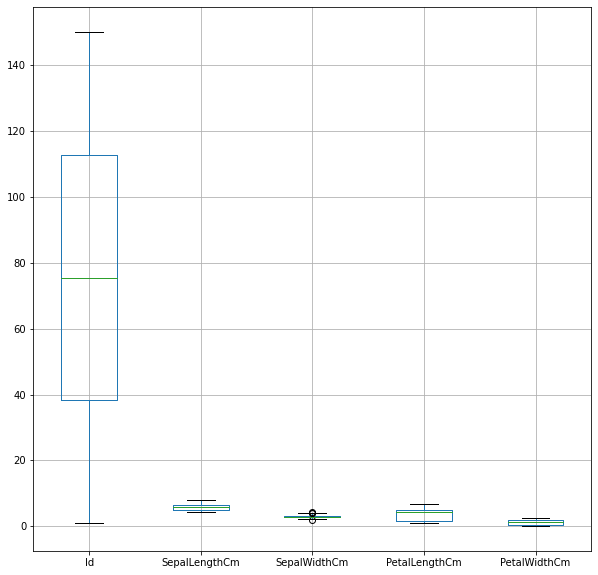

In [6]:
plt.figure(figsize=(10,10))
df.boxplot()

<AxesSubplot:>

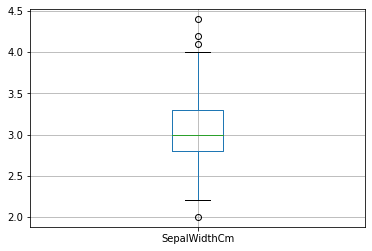

In [7]:
df[['SepalWidthCm']].boxplot()

In [8]:
q1 = df['SepalWidthCm'].quantile(0.25)
q2 = df['SepalWidthCm'].quantile(0.50)
q3 = df['SepalWidthCm'].quantile(0.75)
median = df['SepalWidthCm'].median()
mean= df['SepalWidthCm'].mean()

iqr = q3 - q1
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("mean : ",mean)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 2.8
Q2 : 3.0
Q3 : 3.3
Median : 3.0
mean :  3.0540000000000007
upper_tail : 4.05
lower_tail : 2.05


In [10]:
df[['SepalWidthCm']].loc[df['SepalWidthCm'] > upper_tail]

,SepalWidthCm
15,4.4
32,4.1
33,4.2


In [11]:
median = df[['SepalWidthCm']].loc[(df['SepalWidthCm'] < upper_tail) & (df['SepalWidthCm'] > lower_tail)].median()[0]
median

3.0

In [12]:
df.loc[(df['SepalWidthCm'] > upper_tail) | (df['SepalWidthCm'] < lower_tail), 'SepalWidthCm'] = median


<AxesSubplot:>

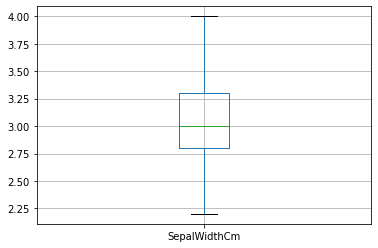

In [13]:
df[['SepalWidthCm']].boxplot()

### Species

In [15]:
df['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [16]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## model training

In [17]:
x=df.drop("Species",axis=1)
y=df["Species"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1, stratify=y)


In [19]:
# Create Instance
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

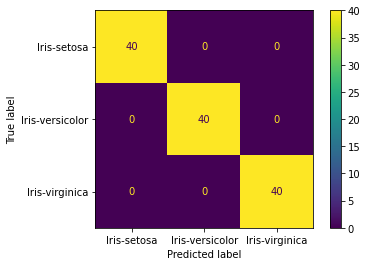

In [20]:
#  Training Data
plot_confusion_matrix(model, x_train, y_train)

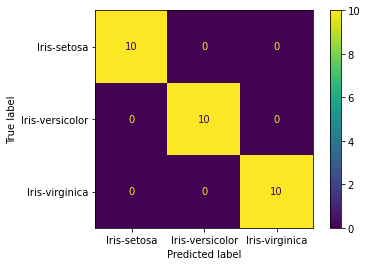

In [21]:
# Testing Data
plot_confusion_matrix(model, x_test, y_test)

In [22]:
# Training Accuracy
model.score(x_train, y_train)

1.0

In [23]:
# Testing Accuracy
model.score(x_test, y_test)

1.0

## model evaluation

In [24]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [25]:
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[1.47586192e-06, 1.30241780e-01, 8.69756744e-01],
       [9.98058506e-01, 1.94149392e-03, 8.40694567e-13],
       [1.63379134e-03, 7.46991975e-01, 2.51374233e-01],
       [9.97111056e-01, 2.88894415e-03, 2.34592310e-12],
       [9.73590598e-01, 2.64093463e-02, 5.58828426e-08],
       [9.99718611e-01, 2.81388605e-04, 3.00373604e-14],
       [4.39724051e-12, 6.81512359e-06, 9.99993185e-01],
       [6.95147217e-07, 4.06287286e-02, 9.59370576e-01],
       [1.92379809e-08, 4.46666707e-03, 9.95533314e-01],
       [4.29046237e-03, 9.89350424e-01, 6.35911394e-03],
       [9.99711872e-01, 2.88128267e-04, 1.87743189e-12],
       [1.13397500e-02, 9.88625876e-01, 3.43744893e-05],
       [5.03495776e-07, 1.75234922e-02, 9.82476004e-01],
       [1.42555809e-02, 9.85627695e-01, 1.16723638e-04],
       [1.43863391e-07, 2.40416419e-02, 9.75958214e-01],
       [9.99405303e-01, 5.94697386e-04, 2.92309938e-12],
       [5.53604392e-06, 1.34965989e-01, 8.65028475e-01],
       [1.48063260e-02, 9.83240

In [28]:
# Testing data
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

#for visualization
mutilevel_matrix= multilabel_confusion_matrix(y_test, y_pred)
print("mutilevel_matrix :\n",mutilevel_matrix)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
*********************************************
Accuracy Score: 1.0
*********************************************
mutilevel_matrix :
 [[[20  0]
  [ 0 10]]

 [[20  0]
  [ 0 10]]

 [[20  0]
  [ 0 10]]]
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [29]:
# Training data

# prediction
y_pred_train = model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

# Visualization

#for visualization
mutilevel_matrix= multilabel_confusion_matrix(y_train, y_pred_train)
print("mutilevel_matrix :\n",mutilevel_matrix)

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
mutilevel_matrix :
 [[[80  0]
  [ 0 40]]

 [[80  0]
  [ 0 40]]

 [[80  0]
  [ 0 40]]]
*********************************************
Accuracy Score: 1.0
*********************************************
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        40

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



## Testing on single row

In [30]:
column_names = x.columns
len(column_names)

5

In [31]:
column_names

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [32]:
x.head(1).T

,0
Id,1.0
SepalLengthCm,5.1
SepalWidthCm,3.5
PetalLengthCm,1.4
PetalWidthCm,0.2


In [33]:
Id=1.0
SepalLengthCm=5.1
SepalWidthCm=3.5
PetalLengthCm=1.4
PetalWidthCm=0.2

In [34]:
project_data = {"columns":list(column_names)}
project_data

{'columns': ['Id',
  'SepalLengthCm',
  'SepalWidthCm',
  'PetalLengthCm',
  'PetalWidthCm']}

In [37]:
array = np.zeros(x.shape[1])
array[0] = Id
array[1] = SepalLengthCm
array[2] = SepalWidthCm
array[3] = PetalLengthCm
array[4] = PetalWidthCm
array

array([1. , 5.1, 3.5, 1.4, 0.2])

In [36]:
flower_prediction = model.predict([array])[0]
flower_prediction

'Iris-setosa'

In [38]:
import pickle

with open("Linear_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [39]:
import json

with open("project_data.json", "w") as f:
    json.dump(project_data, f

SyntaxError: unexpected EOF while parsing (105920202.py, line 4)